<a href="https://colab.research.google.com/github/hrootscraft/customer-segmentation/blob/main/_4_Sentence_Embedding_with_KMeans_Clustering_BankCustomerSegmentationForMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Dependencies

In [15]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
!kaggle datasets download -d prakharrathi25/banking-dataset-marketing-targets

banking-dataset-marketing-targets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
!unzip banking-dataset-marketing-targets.zip

Archive:  banking-dataset-marketing-targets.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [18]:
!pip3 install pyod

## Sentence Embeddings


In [19]:
import pandas as pd
import numpy as np

required_df = pd.read_csv("train.csv",sep=";").iloc[:,0:8]

In [20]:
required_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan'],
      dtype='object')

In [21]:
cat_cols = required_df.select_dtypes(include=['object']).columns
num_cols = required_df.select_dtypes(include=['int64']).columns

In [22]:
!pip3 install sentence_transformers

Sentence Transformers (ST) are a type of model designed for encoding and transforming sentences or text passages into fixed-size vectors. These vectors capture semantic information about the input text and are often used in various natural language processing (NLP) tasks. Here are some common use cases for STs:
<br><br>
  
**Semantic Similarity**: STs is used to measure the semantic similarity between pairs of sentences or text passages. By encoding sentences into vectors, you can compute the similarity or distance between these vectors to determine how closely related the corresponding texts are in meaning.
<br><br>
  
**Information Retrieval**: In search applications, sentence embeddings can be used to index and retrieve documents or sentences that are semantically similar to a given query. This is particularly useful for applications like document retrieval or question-answering systems.
<br><br>
  
**Clustering**: Sentence embeddings can be employed in clustering tasks to group similar sentences or documents together based on their semantic content. This can be useful for organizing large datasets or for discovering hidden patterns in textual data.
<br><br>
  
**Text Classification**: Sentence embeddings can serve as features for various text classification tasks, such as sentiment analysis, topic classification, or spam detection. The semantic representations captured by the embeddings can enhance the performance of these classification models.
<br><br>
  
**Named Entity Recognition (NER)**: STs can be used to improve the performance of NER systems by providing richer contextual representations of sentences, allowing the model to better understand the relationships between words and entities.
<br><br>

Overall, STs play a crucial role in enhancing the capabilities of various NLP applications by capturing and leveraging semantic information from textual data. They are often pre-trained on large corpora and fine-tuned for specific downstream tasks to achieve optimal performance.

In [23]:
# first create a sentence for each sample in the dataset which is composed of all the columns for that sample
# then we transform these sentences into vectors ie we perform sentence embedding using sentence-transformers
def get_sentence(x):
    text = f"""
            Age: {x.age},
            Housing Loan: {x.housing},
            Job: {x.job},
            Marital: {x.marital},
            Education: {x.education},
            Default: {x.default},
            Balance: {x.balance},
            Personal Loan: {x.loan}
            """
    return text

sentences = required_df.apply(lambda x: get_sentence(x), axis=1).tolist()
# sentences

In [24]:
required_df.shape

(45211, 8)

In [25]:
len(sentences)

45211

In [26]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")

In [27]:
output = model.encode(sentences=sentences, show_progress_bar=True, normalize_embeddings=True)
output

Batches:   0%|          | 0/1413 [00:00<?, ?it/s]

array([[ 0.09452171,  0.01106573,  0.03776595, ..., -0.03301417,
        -0.01065918,  0.03172951],
       [ 0.09747079,  0.01349595,  0.04444264, ..., -0.02764437,
        -0.00702207,  0.03228468],
       [ 0.12261744,  0.0075674 ,  0.01792639, ..., -0.02749037,
        -0.00950339,  0.02345506],
       ...,
       [ 0.074936  ,  0.04670157,  0.05255641, ..., -0.03487237,
        -0.04121673,  0.05494824],
       [ 0.08000926,  0.01439945,  0.04113762, ..., -0.03001054,
        -0.04419959,  0.04224908],
       [ 0.11061648,  0.02501512,  0.02949759, ..., -0.03504461,
        -0.02008452,  0.03628102]], dtype=float32)

In [28]:
embedding_df = pd.DataFrame(output)
embedding_df

0         1         2         3         4         5         6    \
0      0.094522  0.011066  0.037766  0.024308 -0.049375  0.013790 -0.074686   
1      0.097471  0.013496  0.044443  0.020975 -0.065281 -0.010618 -0.032426   
2      0.122617  0.007567  0.017926  0.004561 -0.050163  0.000436 -0.049844   
3      0.073048  0.011824  0.041571  0.008020 -0.059140  0.035911 -0.059096   
4      0.075508  0.032220  0.039266  0.035941 -0.027393 -0.009429 -0.029250   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.096007  0.029259  0.050056  0.019188 -0.060668  0.002802 -0.051451   
45207  0.066111  0.037152  0.042381  0.038371 -0.048096  0.024958 -0.048230   
45208  0.074936  0.046702  0.052556  0.029647 -0.040241  0.018356 -0.063383   
45209  0.080009  0.014399  0.041138  0.013092 -0.055466  0.041191 -0.052118   
45210  0.110616  0.025015  0.029498  0.009331 -0.048099  0.007132 -0.038484   

            7         8         9    ...       374       375       376  \
0     -0.019134 -0.025372  0.014889  ...  0.042491  0.010238  0.055433   
1     -0.006913 -0.061024 -0.010923  ...  0.029295  0.022808  0.047532   
2     -0.009265 -0.052337  0.005638  ...  0.041894 -0.002940  0.055884   
3     -0.015304 -0.033622  0.011234  ...  0.043318 -0.001167  0.041948   
4     -0.028651 -0.056505 -0.013219  ...  0.031599  0.026473  0.021458   
...         ...       ...       ...  ...       ...       ...       ...   
45206 -0.011395 -0.038307  0.014561  ...  0.026584  0.012842  0.046319   
45207 -0.006961 -0.053636  0.012225  ...  0.038376 -0.001143  0.029478   
45208 -0.017292 -0.045923  0.012797  ...  0.038268  0.011647  0.038170   
45209 -0.022045 -0.046045  0.022875  ...  0.044707  0.000527  0.039673   
45210 -0.005869 -0.045818  0.008375  ...  0.042815 -0.008215  0.049800   

            377       378       379       380       381       382       383  
0      0.006919 -0.046817 -0.032791  0.148474 -0.033014 -0.010659  0.031730  
1     -0.000720 -0.061062 -0.036767  0.149301 -0.027644 -0.007022  0.032285  
2      0.024722 -0.028290 -0.056120  0.149985 -0.027490 -0.009503  0.023455  
3     -0.001560 -0.037334 -0.049491  0.109875 -0.034163 -0.036238  0.016253  
4      0.023974 -0.041437 -0.027188  0.139956 -0.041372 -0.041033  0.038509  
...         ...       ...       ...       ...       ...       ...       ...  
45206  0.001749 -0.040493 -0.039932  0.140354 -0.041650 -0.002458  0.033950  
45207  0.005872 -0.048054 -0.059010  0.162383 -0.040774 -0.034728  0.048220  
45208  0.015069 -0.035838 -0.047073  0.140167 -0.034872 -0.041217  0.054948  
45209 -0.003454 -0.027086 -0.048994  0.100869 -0.030011 -0.044200  0.042249  
45210  0.024042 -0.024651 -0.063023  0.136521 -0.035045 -0.020085  0.036281  

[45211 rows x 384 columns]

In [29]:
embedding_df.columns

RangeIndex(start=0, stop=384, step=1)

In [30]:
# handle outliers for the embedding_df
from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(embedding_df)

outliers = clf.predict(embedding_df)
embedding_df["outliers"] = outliers
required_df["outliers"] = outliers # use later on with SHAP

embedding_df_wo_outliers = embedding_df[embedding_df.outliers == 0]
embedding_df_wo_outliers = embedding_df_wo_outliers.drop(["outliers"], axis = 1)

embedding_df_w_outliers = embedding_df.copy()
embedding_df_w_outliers = embedding_df_w_outliers.drop(["outliers"], axis = 1)

In [31]:
print("Without Outliers, embedding_df shape is: ",embedding_df_wo_outliers.shape)
print("With Outliers, embedding_df shape is: ",embedding_df_w_outliers.shape)

Without Outliers, embedding_df shape is:  (40690, 384)
With Outliers, embedding_df shape is:  (45211, 384)


- We can observe that even when we simply used KMeans by encoding categorical data and transforming numerical data, we got the same amount of outliers in that order:

  (40690, 19)

  (45211, 19)
- Due to the large dimension of the vector created by embedding, small variations in the data can be seen with greater precision.



## KMeans

### Decide K

#### Elbow Method

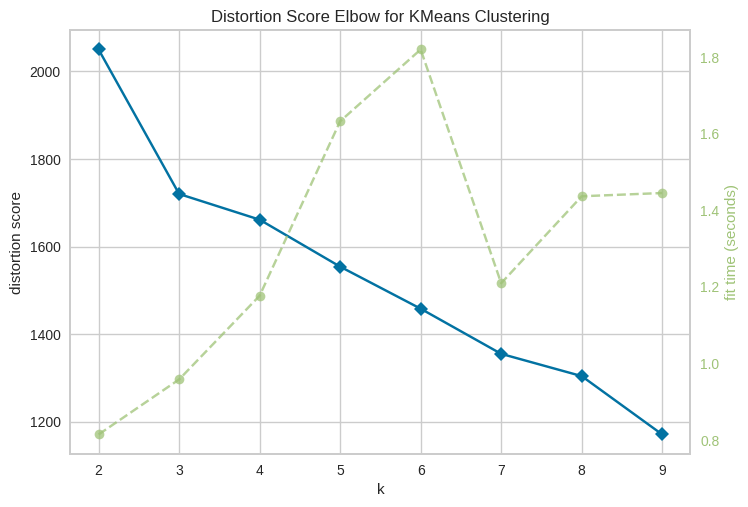

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Select k using the Elbow Method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10), locate_elbow=False)
visualizer.fit(embedding_df_w_outliers)
visualizer.show()

- Outliers can significantly impact the determination of the optimal number of clusters (K). By using a dataset with outliers, you may get a more robust estimate of K that is less sensitive to the influence of outliers.
- Once you have determined the optimal K using a dataset with outliers, training the K-means model on a dataset without outliers may result in cleaner and more meaningful clusters. Outliers could distort the centroids and boundaries of clusters, and training on clean data can lead to better-defined clusters.
-  Just FYI, distortion score is also called as within-cluster sum of squares (WCSS).
- Here, we can see we'd be going good for k=3/4/5. Let's validate with Silouette plots.

#### Silhouette Plot

In [33]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.cm as cm

def silhouette_plot(X, n_clusters):
    # set the plot limits
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, max_iter=1000, n_init=10, init='k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label each cluster in the silhouette plot
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Update y_lower for the next plot
        y_lower = y_upper + 10

        plt.title(f"Silhouette Plot for n_cluster = {n_clusters}")
        plt.xlabel("Silhouette coefficient values")
        plt.ylabel("Cluster Label")

        # Add a vertical line at the average silhouette score
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        # Remove y-axis labels
        plt.yticks([])
        # Set x-axis ticks
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

For n_clusters = 2, the average silhouette_score is: 0.16841250658035278


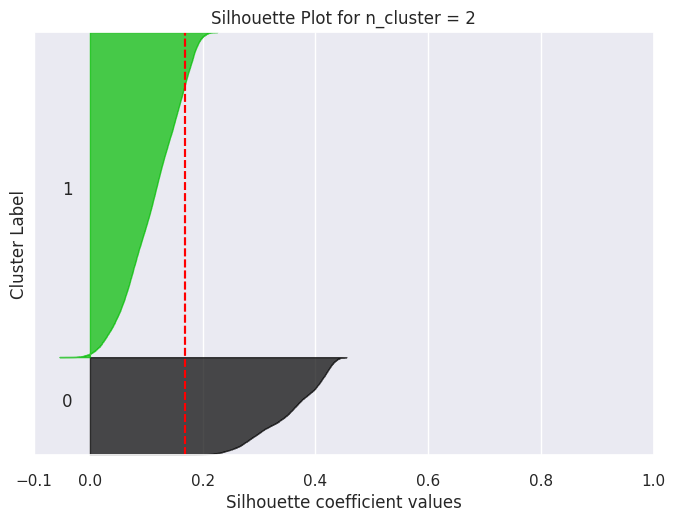

For n_clusters = 3, the average silhouette_score is: 0.1939765065908432


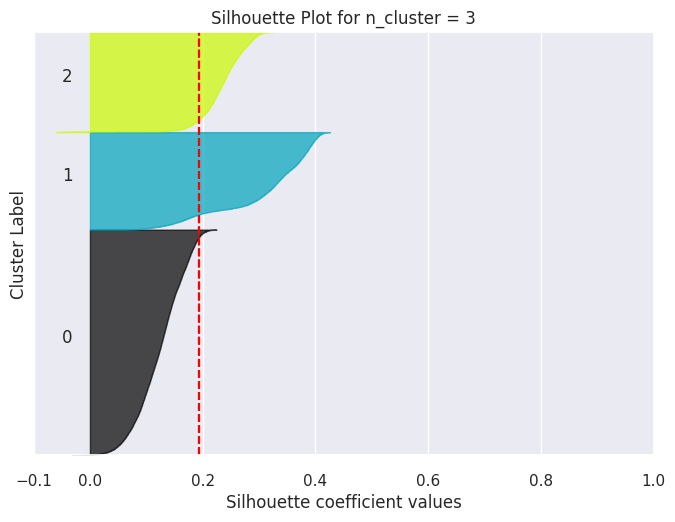

For n_clusters = 4, the average silhouette_score is: 0.19418679177761078


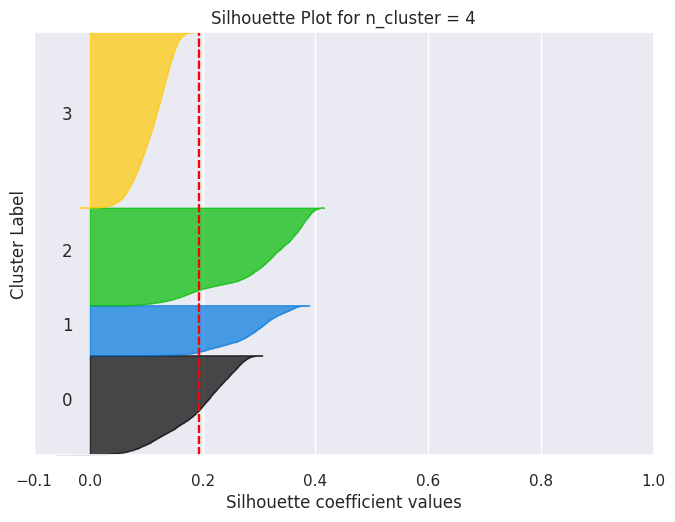

For n_clusters = 5, the average silhouette_score is: 0.20770101249217987


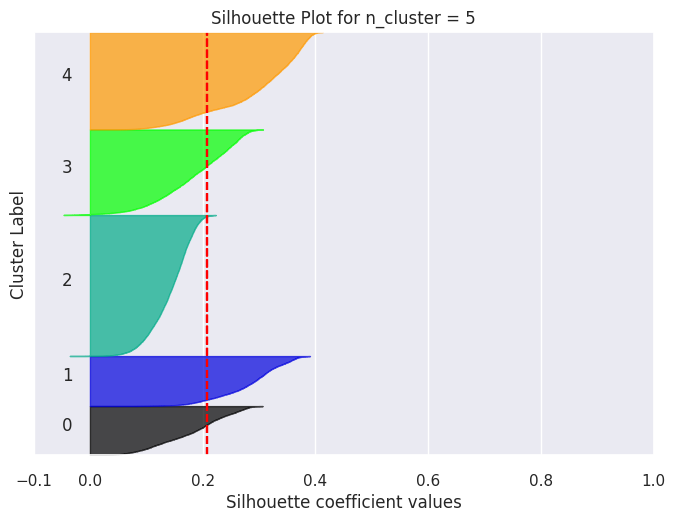

For n_clusters = 6, the average silhouette_score is: 0.18765294551849365


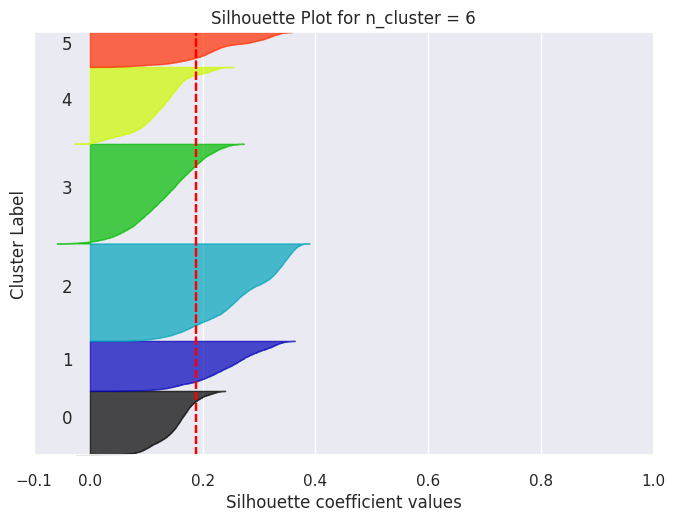

For n_clusters = 7, the average silhouette_score is: 0.19610382616519928


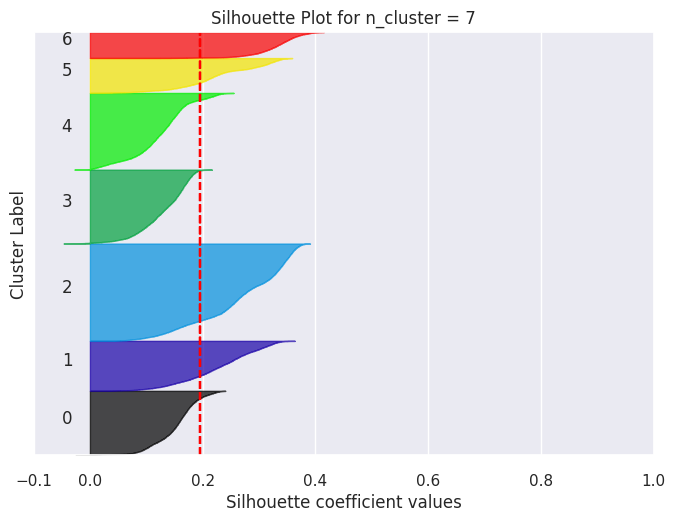

For n_clusters = 8, the average silhouette_score is: 0.20548389852046967


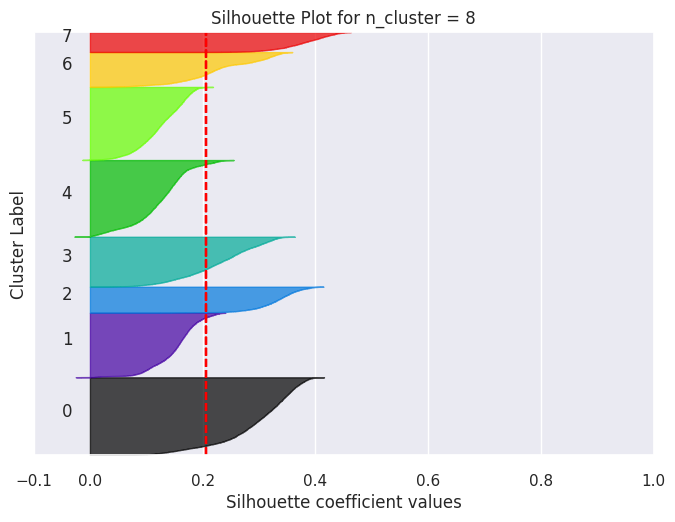

For n_clusters = 9, the average silhouette_score is: 0.2097432017326355


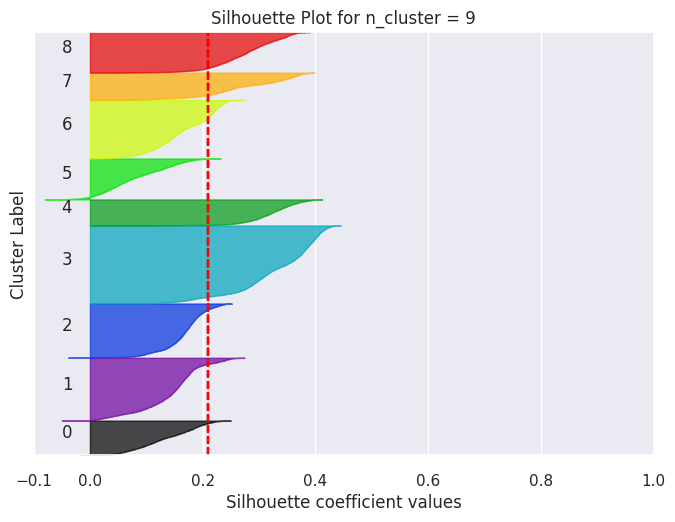

In [34]:
# Loop through each value of k and create a silhouette plot
for n_clusters in range(2,10):
    silhouette_plot(embedding_df_wo_outliers, n_clusters)
    # plt.savefig('Silhouette_plot_{}.png'.format(n_clusters))
    plt.show()
    # Close the plot to avoid overlapping when saving multiple plots
    # plt.close()

In [35]:
# For n_clusters = 2, the average silhouette_score is: 0.20874418318271637
# For n_clusters = 3, the average silhouette_score is: 0.22654952108860016
# For n_clusters = 4, the average silhouette_score is: 0.21660175919532776
# For n_clusters = 5, the average silhouette_score is: 0.23337021470069885
# For n_clusters = 6, the average silhouette_score is: 0.21788983047008514
# For n_clusters = 7, the average silhouette_score is: 0.2229606956243515
# For n_clusters = 8, the average silhouette_score is: 0.22984632849693298

- We see in the plot with n_clusters=4, cluster 1 is not even getting classified properly and few of which are negatively classified. There's also imbalance in the cluster size.
- Looking at the one with  n_clusters=5, it seems comparitively better. It even has a maximized silhouette score among the lot.

So, we decide on k=5.

### Model

In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=42)
predicted_cluster_labels = km.fit_predict(embedding_df_wo_outliers)
predicted_cluster_labels

array([2, 0, 1, ..., 2, 2, 1], dtype=int32)

In [37]:
np.unique(predicted_cluster_labels)

array([0, 1, 2, 3, 4], dtype=int32)

## Evaluation

### Metrics

In [38]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

"""
The Davies Bouldin index is defined as the average similarity measure
of each cluster with its most similar cluster, where similarity
is the ratio of within-cluster distances to between-cluster distances.
It assesses the compactness and separation of clusters. It is based on the idea that
good clusters should have minimal intra-cluster distance and maximal inter-cluster distance.

Range:
    Minimum Value: The Davies-Bouldin Index has a minimum value of 0,
    which occurs when clusters are perfectly separated with no overlap.

    Maximum Value: There is no specific upper bound for the Davies-Bouldin Index.
    However, it tends to increase with worse clustering solutions.
    The closer the index is to 0, the better the clustering solution.
"""
print(f"Davies bouldin score: {davies_bouldin_score(embedding_df_wo_outliers,predicted_cluster_labels)}")


"""
The Calinski-Harabasz Index, also known as the Variance Ratio Criterion,
is a measure used to evaluate the goodness of a clustering technique.
It is calculated as the ratio of the between-cluster variance to the
within-cluster variance. The index is higher when clusters are dense
and well separated. A higher Calinski-Harabasz Index indicates a better clustering result.

The formula for the Calinski-Harabasz Index is given by:
CH = B(k)/W(k) × (N−k)/(k−1)
Where:
    CH is the Calinski-Harabasz Index.
    B(k) is the between-cluster variance.
    W(k) is the within-cluster variance.
    N is the total number of data points.
    k is the number of clusters.

Interpretation:
    Higher Values: A higher Calinski-Harabasz Index suggests better-defined clusters.
    When comparing different clustering solutions, the one with a higher CH index is considered better.

    Optimal Number of Clusters: Researchers often use the Calinski-Harabasz Index to
    determine the optimal number of clusters for a dataset. The number of clusters
    that maximizes the index is considered the optimal choice.

    Consideration of Other Metrics: While the Calinski-Harabasz Index is a useful metric,
    it's often recommended to consider it in conjunction with other clustering
    evaluation metrics, as no single metric is perfect for all types of data.

Range:
    Minimum Value: Theoretically, the minimum value of the Calinski-Harabasz Index is 0.
    This would happen if the between-cluster variance is zero, meaning there is no separation between clusters.

    Maximum Value: There is no upper bound for the Calinski-Harabasz Index.
    Higher values are generally better, indicating well-separated and dense clusters.
    The maximum value is influenced by the number of clusters and the characteristics of the data.
"""
print(f"Calinski Score: {calinski_harabasz_score(embedding_df_wo_outliers,predicted_cluster_labels)}")


"""
The silhouette score is a metric used to calculate the goodness of
fit of a clustering algorithm, but can also be used as
a method for determining an optimal value of k.

Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either
the data or the value of k is incorrect.

1 is the ideal value and indicates that clusters are very
dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(embedding_df_wo_outliers, predicted_cluster_labels)}")

Davies bouldin score: 1.8315565221484207
Calinski Score: 6367.739048535576
Silhouette Score: 0.2076984941959381


- The Davies bouldin score suggests a smaller distance between clusters.

### Visualization

In [39]:
!pip3 install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 5.9 MB/s eta 0:00:00


#### PCA

In [40]:
import prince

def get_pca_2d(df, predicted_labels):
    pca_2d_obj = prince.PCA(
      n_components=2,
      n_iter=3,
      rescale_with_mean=True,
      rescale_with_std=True,
      copy=True,
      check_input=True,
      engine='sklearn',
      random_state=42
    )
    pca_2d_obj.fit(df)
    df_pca_2d = pca_2d_obj.transform(df)
    df_pca_2d.columns = ["PC1", "PC2"]
    df_pca_2d["cluster"] = predicted_labels
    return pca_2d_obj, df_pca_2d

In [41]:
import plotly.express as px

def plot_pca_2d(df, opacity=0.8, width_line = 0.1):
    # convert the datatype of cluster labels to object so as to get considered as a categorical column
    df = df.astype({"cluster": "object"})
    # df = df.sort_values("cluster")
    fig = px.scatter(df, x="PC1", y="PC2", color='cluster', template="plotly", color_discrete_sequence=px.colors.qualitative.Pastel)\
    .update_traces(marker={"size": 8, "opacity": opacity,"line":{"width": width_line, "color": "black"}})\
    .update_layout(width = 800, height = 800, autosize = True, showlegend = True,scene = dict(xaxis=dict(title = 'PC1'), yaxis=dict(title = 'PC2')))
    fig.show()

In [42]:
pca_2d_object, df_pca_2d = get_pca_2d(embedding_df_wo_outliers, predicted_cluster_labels)
print(df_pca_2d)

             PC1        PC2  cluster
0       0.526576  -7.569790        2
1     -10.517161  -0.266175        0
3      13.608658   4.375038        1
5       0.061096  -6.002482        2
6      -8.851500   5.197777        0
...          ...        ...      ...
45205  -8.913124   0.739579        0
45206  -5.145134 -11.828809        3
45207  -0.658099   0.635089        2
45208  -0.765130  -3.429287        2
45209  10.769404   4.884885        1

[40690 rows x 3 columns]


In [43]:
plot_pca_2d(df_pca_2d, opacity=1, width_line = 0.5)

In [44]:
pca_2d_object.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0             65.199        16.98%                     16.98%
1             51.316        13.36%                     30.34%

In [45]:
def get_pca_3d(df, predict):
    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )
    pca_3d_object.fit(df)
    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["PC1", "PC2", "PC3"]
    df_pca_3d["cluster"] = predict
    return pca_3d_object, df_pca_3d

In [46]:
def plot_pca_3d(df, opacity=0.8, width_line = 0.1):
    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='cluster', template="plotly", color_discrete_sequence=px.colors.qualitative.Pastel)\
    .update_traces(marker={"size": 4, "opacity": opacity, "line": {"width": width_line,"color": "black"}})\
    .update_layout(width = 800, height = 800, autosize = True,
                   showlegend = True, scene = dict(xaxis=dict(title = 'PC1'),
                                                   yaxis=dict(title = 'PC2'),
                                                   zaxis=dict(title = 'PC3')))
    fig.show()

In [47]:
pca_3d_object, df_pca_3d = get_pca_3d(embedding_df_wo_outliers, predicted_cluster_labels)
plot_pca_3d(df_pca_3d, opacity=1, width_line = 0.1)

- One way we can visualize how compact the clusters are is by changing opacity of the points in 3D representation. This means that when the points are agglomerated in a certain space, a black spot can be observed.

In [48]:
plot_pca_3d(df_pca_3d, opacity=0.2, width_line = 0.1)

- There are several points in the space where the points cluster together which indicates well differentiation and the model knows how to differentiate the points.
- Although, there are also several clusters that cannot be differentiated like 1 and 3. We can try t-SNE to capture that information.

In [49]:
pca_3d_object.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0             65.199        16.98%                     16.98%
1             51.316        13.36%                     30.34%
2             39.385        10.26%                     40.60%

- Some clusters are overlapping but we should once see if t-sne does a better job in capturing the non-linearity if present.
- The first 3 components of PCA take into account about 40% of the variability in the data. Usually when this is about 50%, more or less conclusions can be drawn. And with the data that we have this is acceptable but not ideal.

#### T-SNE

In [50]:
from sklearn.manifold import TSNE

sampling_data = embedding_df_wo_outliers.sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(predicted_cluster_labels).sample(frac=0.5, replace=True, random_state=1)[0].values

In [51]:
df_tsne_3d = TSNE(n_components=3, learning_rate=700, init='random', perplexity=100, n_iter = 1000).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["PC1", "PC2",'PC3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, opacity=1, width_line = 0.1)

- The clusters now do seem well separated and no cluster is overlapping.

In [52]:
df_tsne_2d = TSNE(n_components=2,
                  learning_rate=500,
                  init='random',
                  perplexity=200,
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["PC1", "PC2"])
df_tsne_2d["cluster"] = sampling_clusters
plot_pca_2d(df_tsne_2d, opacity=1, width_line = 0.5)

- We thus observe clusters in t-SNE are more separated and better differentiated than in PCA.


### Evaluation by Classification

In [53]:
!pip3 install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.1 MB/s eta 0:00:00


In [54]:
required_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'outliers'],
      dtype='object')

In [55]:
required_df_wo_outliers = required_df[required_df["outliers"] == 0]
required_df_wo_outliers = required_df_wo_outliers.drop("outliers", axis = 1)

In [56]:
for col in cat_cols:
    required_df_wo_outliers[col] = required_df_wo_outliers[col].astype('category')

In [57]:
import lightgbm as lgb
lgbm_clf_for_embed_km = lgb.LGBMClassifier(colsample_bytree=0.8)
lgbm_clf_for_embed_km.fit(X=required_df_wo_outliers,
                    y=predicted_cluster_labels,
                    feature_name="auto",
                    categorical_feature="auto")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 40690, number of used features: 8
[LightGBM] [Info] Start training from score -1.598926
[LightGBM] [Info] Start training from score -1.468256
[LightGBM] [Info] Start training from score -1.098932
[LightGBM] [Info] Start training from score -2.136742
[LightGBM] [Info] Start training from score -2.151634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier(colsample_bytree=0.8)

In [58]:
from sklearn.model_selection import cross_val_score

# scoring metric is f1 weighted because among the 5 clusters our KMeans model found one of them
# was thin in size ergo safer side we take weighted f1 score to account for imbalanced classes
cv_scores_lgbm_clf_for_embed_km = cross_val_score(lgbm_clf_for_embed_km, required_df_wo_outliers, predicted_cluster_labels, scoring='f1_weighted')
print(f'CV F1 score for KMeans clusters is {np.mean(cv_scores_lgbm_clf_for_embed_km)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 32552, number of used features: 8
[LightGBM] [Info] Start training from score -1.598956
[LightGBM] [Info] Start training from score -1.468202
[LightGBM] [Info] Start training from score -1.098950
[LightGBM] [Info] Start training from score -2.136585
[LightGBM] [Info] Start training from score -2.151793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

- CV score for Sentence Embedding with KMeans is 0.997 which means that the customers are grouped in meaningful and distinguishable clusters. Now, let’s see the feature importances to determine if the classifier has used all the information available to it.
- This CV score is better than the model with only KMeans.

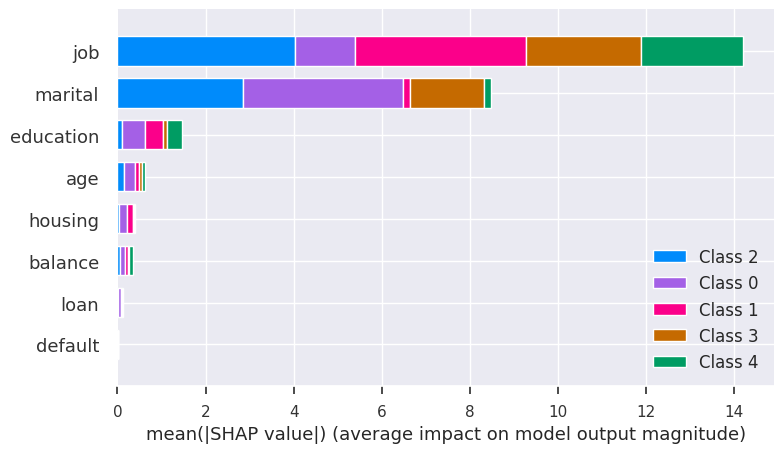

In [59]:
import shap
km_explainer = shap.TreeExplainer(lgbm_clf_for_embed_km)
km_shap_values = km_explainer.shap_values(required_df_wo_outliers)
shap.summary_plot(km_shap_values, required_df_wo_outliers, plot_type="bar")

- KMeans model with sentence emnedding is based above all on the “marital” and “job” features.
- There are other features which don't provide much information. In a real world problem, you'd want to discard these uninformative features and then try new/modified model.

## Cluster Information

For each cluster we find the mean value for the numerical features and the most frequent value for categorical features.

In [60]:
required_df_wo_outliers["cluster"] = predicted_cluster_labels

cluster_summary = required_df_wo_outliers.groupby('cluster').agg(
    {
        'job': lambda x: x.value_counts().index[0],
        'marital': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'housing': lambda x: x.value_counts().index[0],
        'loan': lambda x: x.value_counts().index[0],
        'age':'mean',
        'balance': 'mean',
        'default': lambda x: x.value_counts().index[0],
    }
)

cluster_summary.sort_values("age").reset_index()

cluster          job  marital  education housing loan        age  \
0        0   management   single   tertiary     yes   no  33.900657   
1        4       admin.  married  secondary     yes   no  39.658495   
2        1  blue-collar  married  secondary     yes   no  40.101793   
3        3   technician  married  secondary     yes   no  42.241099   
4        2   management  married   tertiary      no   no  45.662143   

       balance default  
0  1361.785871      no  
1  1113.729290      no  
2  1059.809539      no  
3  1210.715386      no  
4  1629.730290      no

#### Insights
- In management, we see that the single managers are younger than the older married ones. And they have comparitively lesser bank balance than the married ones. This might be due to experience but we don't have that data.
- Overall,  Kmeans + Sentence Embedding model is optimal since it needs fewer variables to be able to give good predictions.

## Further Line of Thought:

- The model we employed is not well-suited for comparing numerical values in fields. For instance, the sentence "Salary = 10000" yields embeddings that are more similar to those of the sentence "Salary = 100000" than to the embeddings of "Salary = 11000." This limitation arises because the model excels at comparing text but treats numbers as characters rather than quantities. Consequently, only sentences related to job and marital status proved to be significant, as the model's strength lies in comparing textual information rather than numerical data.
- If you want to enhance the clustering performance on numerical data, you can consider the following modifications the above method:

  **Hybrid Embedding:**
  Use a combination of sentence embedding for text features and a different embedding method for numerical features.
  For numerical features, consider using methods like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) to create embeddings.

  **Feature Engineering for Numerical Data:**
  Create additional text-based features from numerical fields. For example, instead of just "Salary = 10000," you could have "Salary is High," "Salary is Medium," "Salary is Low," etc. This way, numerical information is translated into text, making it compatible with the sentence embedding model.